### BioPython

In [ ]:
### http://biopython.org/DIST/docs/tutorial/Tutorial.pdf

In [1]:
from Bio.Seq import Seq

In [6]:
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")

template_dna = coding_dna.reverse_complement()

messenger_rna = coding_dna.transcribe()

messenger_rna.back_transcribe()

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')

#### Translation

In [16]:
messenger_rna.translate()

coding_dna.translate()

Seq('MAIVMGR*KGAR*')

In [15]:
coding_dna.translate(table="Vertebrate Mitochondrial")

coding_dna.translate(table=2)

Seq('MAIVMGRWKGAR*')

In [25]:
coding_dna.translate(to_stop=True)

Seq('MAIVMGR')

#### Codon Tables

In [29]:
from Bio.Data import CodonTable

standard_table = CodonTable.unambiguous_dna_by_name["Standard"]

mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]

print(standard_table)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [30]:
mito_table.stop_codons

['TAA', 'TAG', 'AGA', 'AGG']

In [31]:
mito_table.start_codons

['ATT', 'ATC', 'ATA', 'ATG', 'GTG']

In [32]:
mito_table.forward_table["ACG"]

'T'

#### Other

In [33]:
unknown_seq = Seq(None, 10)

unknown_seq

Seq(None, length=10)

In [37]:
seq = Seq({117512683: "TTGAAAACCTGAATGTGAGAGTCAGTCAAGGATAGT"}, length=159345973)
    
seq + seq

Seq({117512683: 'TTGAAAACCTGAATGTGAGAGTCAGTCAAGGATAGT', 276858656: 'TTGAAAACCTGAATGTGAGAGTCAGTCAAGGATAGT'}, length=318691946)

In [39]:
seq[117512670:117512690]

Seq({13: 'TTGAAAA'}, length=20)

In [55]:
from Bio.Seq import MutableSeq

mutable_seq = MutableSeq("GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA")

mutable_seq.remove("T")

mutable_seq.reverse()

mutable_seq

MutableSeq('AGCCCGTGGGAAAGTCGCCGGGTAATGTACCG')

#### IO

In [68]:
# Fasta records

from Bio import SeqIO

# record = SeqIO.read('files/ls_orchid.fasta', 'fasta')

for record in SeqIO.parse("files/ls_orchid.fasta", "fasta"):

    # print(record.seq)
    # print(record.id)
    print(record)

    break

ID: gi|2765658|emb|Z78533.1|CIZ78533
Name: gi|2765658|emb|Z78533.1|CIZ78533
Description: gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 0
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')


#### Net

In [84]:
from Bio import Entrez
from Bio import SeqIO

Entrez.email = "A.N.Other@example.com"

with Entrez.efetch(db="nucleotide", 
                   rettype="fasta", 
                   retmode="text", 
                   id="6273291,6273290,6273289") as handle:
    
    for seq_record in SeqIO.parse(handle, "fasta"):
    
        print(seq_record)

ID: AF191665.1
Name: AF191665.1
Description: AF191665.1 Opuntia marenae rpl16 gene; chloroplast gene for chloroplast product, partial intron sequence
Number of features: 0
Seq('TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA')
ID: AF191664.1
Name: AF191664.1
Description: AF191664.1 Opuntia clavata rpl16 gene; chloroplast gene for chloroplast product, partial intron sequence
Number of features: 0
Seq('TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA')
ID: AF191663.1
Name: AF191663.1
Description: AF191663.1 Opuntia bradtiana rpl16 gene; chloroplast gene for chloroplast product, partial intron sequence
Number of features: 0
Seq('TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA')


In [93]:
orchid_dict = SeqIO.to_dict(SeqIO.parse("files/ls_orchid.fasta", "fasta"))

In [98]:
orchid_dict = SeqIO.index("files/ls_orchid.fasta", "fasta")

orchid_dict

SeqIO.index('files/ls_orchid.fasta', 'fasta', alphabet=None, key_function=None)

#### Write

In [99]:
seq_record

SeqRecord(seq=Seq('TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA'), id='AF191663.1', name='AF191663.1', description='AF191663.1 Opuntia bradtiana rpl16 gene; chloroplast gene for chloroplast product, partial intron sequence', dbxrefs=[])

In [100]:
SeqIO.write(seq_record, "files/record.fasta", "fasta")

1

#### PDB

In [130]:
from Bio.PDB.PDBParser import PDBParser

parser = PDBParser(PERMISSIVE=1)

structure = parser.get_structure("6e3i", "files/6e3i.pdb")

# model = structure[0]
# chain = model["A"]
# residue = chain[1]
# atom = residue["CA"]

for model in structure:
    for chain in model:        
        for residue in chain:
            for atom in residue:
                print(atom)
            break
        break

<Atom N>
<Atom CA>
<Atom C>
<Atom O>
<Atom H1>
<Atom H2>
<Atom H3>
<Atom HA2>
<Atom HA3>


/home/mohor/.local/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4495.
  warnings.warn(
/home/mohor/.local/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4686.
  warnings.warn(


In [131]:
atoms = structure.get_atoms()
atoms = chain.get_atoms()

for atom in atoms:
    print(atom)
    break

<Atom N>


In [132]:
# Coordinates of all CA atoms in a structure with B factor greater than 50

for model in structure.get_list():
    for chain in model.get_list():
        for residue in chain.get_list():
            if residue.has_id("CA"):
                ca = residue["CA"]
                if ca.get_bfactor() > 50.0:
                    print(ca.get_coord())

[-22.213   0.937   7.884]
[-24.675   1.447   5.041]
[-0.763 12.454  6.437]
[-2.785 14.414 12.573]
[-5.634 13.1   14.658]
[-7.16   9.663 15.019]
[ -7.32  -11.433  -9.255]
[-7.323 -9.067 -6.263]


In [133]:
# Print out all the residues that contain disordered atoms

for model in structure.get_list():
    for chain in model.get_list():
        for residue in chain.get_list():
            if residue.is_disordered():
                resseq = residue.get_id()[1]
                resname = residue.get_resname()
                model_id = model.get_id()
                chain_id = chain.get_id()
                print(model_id, chain_id, resname, resseq)

0 A ASN 39
0 A VAL 40


In [134]:
# Polypeptide builder

from Bio.PDB.Polypeptide import PPBuilder

ppb = PPBuilder()

model_nr = 1

polypeptide_list = ppb.build_peptides(structure, model_nr)

for polypeptide in polypeptide_list:
    print(polypeptide.get_sequence())


GMTDCEFGYIYRLAQDYLQCVLQIPQPGSGPSKTSRVLQNVAFSVQKEVEKNLKSCLDNVNVVSVDTARTLFNQVMEKEFEDGIINWGRIVTIFAFEGILIKKLLRQQIAPDVDTYKEISYFVAEFIMNNTGEWIRQNGGWENGFVKKFEPK
QRVVHIAAGLRRTGDQLEAYG


In [ ]:
# Rename chain

chain.id = new_name

# Add chain

from Bio.PDB.Chain import Chain

my_chain = Chain("C")
model.add(my_chain)

####  Protein Data Bank

In [145]:
from Bio.PDB.PDBList import PDBList

pdbl = PDBList()

pdbl.retrieve_pdb_file(pdb_code="6E3i", pdir='files/')

Structure exists: 'files/6e3i.cif' 


'files/6e3i.cif'

#### Clustal Omega - Alignment Tool

In [ ]:
# https://www.ebi.ac.uk/Tools/msa/clustalo/

In [ ]:
# https://biopython.org/docs/1.76/api/Bio.Align.Applications.html

# https://www.ebi.ac.uk/Tools/services/web_clustalo/toolresult.ebi?jobId=clustalo-E20221212-143517-0535-27142377-p1m&analysis=alignments

# https://www.biostars.org/p/382859/

# https://www.biostars.org/p/449142/

In [3]:
from Bio.Align.Applications import ClustalOmegaCommandline

In [4]:
in_file = "6E3I.fasta"
out_file = "Clustal_6E3I.phylip"

clustalomega_cline = ClustalOmegaCommandline(infile=in_file,
                                             outfile=out_file,
                                             outfmt='phylip',
                                             verbose=True,
                                             auto=False)

In [5]:
print(clustalomega_cline)

clustalo -i 6E3I.fasta -o Clustal_6E3I.phylip --outfmt phylip -v


In [7]:
clustalomega_cline()

In [ ]:
from Bio import AlignIO
alignment = AlignIO.read("out_filename.phylip", "clustalo")

In [ ]:
# 1. to get output in FASTA format

# $ /path/to/muscle -in input.fasta -out output.fasta -fasta

# 2. to get output in ClustalW format

# $ /path/to/muscle -in input.fasta -out output.aln -clw

# 3. to get output in HTML format

# $ /path/to/muscle -in input.fasta -out output.html -html

# 4. to get output in MSF format

# $ /path/to/muscle -in input.fasta -out output.msf -msf

# 5. to get output in PHYLIP sequential format

# $ /path/to/muscle -in input.fasta -out output.phy -phys

# 6. to get output in interleaved format

# $ /path/to/muscle -in input.fasta -out output.phy -phyi

### RDKit

In [38]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [247]:
from IPython.display import SVG

def draw_molecule(molecule, image_size=(500, 300)):

    DRAW_OPTIONS = Chem.Draw.rdMolDraw2D.MolDrawOptions()

    Chem.Draw.rdMolDraw2D.SetDarkMode(DRAW_OPTIONS)

    svg_drawer = Chem.Draw.rdMolDraw2D.MolDraw2DSVG(*image_size)

    svg_drawer.SetDrawOptions(DRAW_OPTIONS)

    svg_drawer.DrawMolecule(molecule)

    svg_drawer.FinishDrawing()

    image = SVG(svg_drawer.GetDrawingText())
    
    return image   

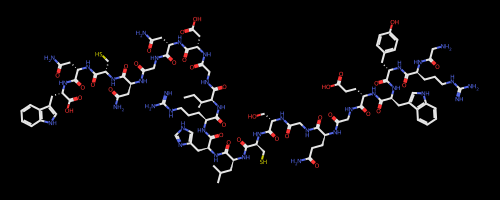

In [248]:
peptide = Chem.rdmolfiles.MolFromFASTA('GRYWEGQGSCLHRIGDNGNCNW')

peptide.SetProp("_Name","peptide-1")

draw_molecule(peptide, (500, 200))

#### Conformation

In [276]:
peptide_h = Chem.AddHs(peptide)

embedding_parameters = AllChem.ETKDGv2()
embedding_parameters.useRandomCoords = True

AllChem.EmbedMolecule(peptide_h, params=embedding_parameters)

0

In [284]:
FORCE_FIELD_OPTIMIZER = Chem.rdForceFieldHelpers.UFFOptimizeMolecule
# FORCE_FIELD_OPTIMIZER = Chem.rdForceFieldHelpers.MMFFOptimizeMolecule

OPTIMIZATION_LIMIT = 10

iteration = 0

while FORCE_FIELD_OPTIMIZER(peptide_h) and iteration <= OPTIMIZATION_LIMIT:
    
    print("Iteration:", iteration)
    
    display(draw_molecule(peptide_h, (200, 200)))
    
    iteration += 1

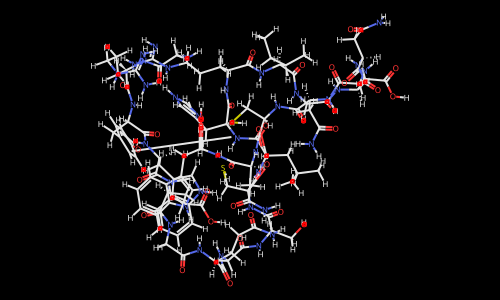

In [285]:
draw_molecule(peptide_h)

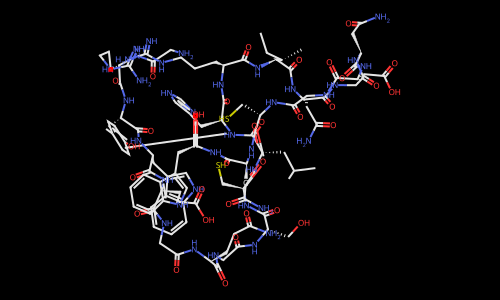

In [286]:
conformed_peptide = Chem.RemoveHs(peptide_h)

# Chem.MolToPDBFile(conformed_peptide, 'conformed_peptide.pdb')

draw_molecule(conformed_peptide)

In [259]:
conformer = conformed_peptide.GetConformer()
coordinates = conformer.GetPositions()

In [467]:
 # print(Chem.MolToMolBlock(conformed_peptide)) 

#### Fingerprints

In [347]:
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

conformed_fingerprint = FingerprintMols.FingerprintMol(conformed_peptide)

unconformed_fingerprint = FingerprintMols.FingerprintMol(peptide)

DataStructs.FingerprintSimilarity(conformed_fingerprint, unconformed_fingerprint)

1.0

In [352]:
unfolded_conformed_fingerprint = Chem.rdmolops.RDKFingerprint(conformed_peptide, fpSize=1000)

unfolded_conformed_fingerprint.ToBitString()

'101110111111111000111111101100111111111111111100101111111111011110111111111100111011101111111111111111101011111011011111111101011111110111010111111110111111111110111111011101011111111111111111111111011111111101111111011011011111101101111111110111111111111111111011100101111101011110110011110110101110111011111111011111110111010111111111111100110111101010111101111111011111111011110111111111111011111100111111111111011111101011101111011100111101111111111101111111111111011011011111111011111111111111011110111110010111101011101111111111011110111110011111111011101111110011111111110111111101011111011111110111110111111111111111111111111111111111110011111111111100111111111111101011111111110111110111011111101111111101010101101011011011110101111111011111001101111111010111111101111001111101111111011000111111111111111111011111101111111011111111111111111001111111011010111111111111110101011110100111010111101111101111111111111111111111011100110111110101111111101001011111111011111101000111111011011111111

In [369]:
rdkbi = {}

rdkfp = Chem.RDKFingerprint(conformed_peptide, maxPath=5, bitInfo=rdkbi)

rdkbi[5]

[[34, 37], [94, 95], [96, 97], [172, 175]]

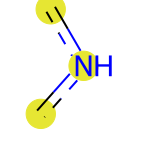

In [370]:
Chem.Draw.DrawRDKitBit(conformed_peptide, 5, rdkbi)

In [384]:
low_energy_peptide = Chem.MolFromFASTA('GRYWEGQGSCLHRIGDNGNCNW')
high_energy_peptide = Chem.MolFromFASTA('GQWKREIGALLRRPADKLNAQF')

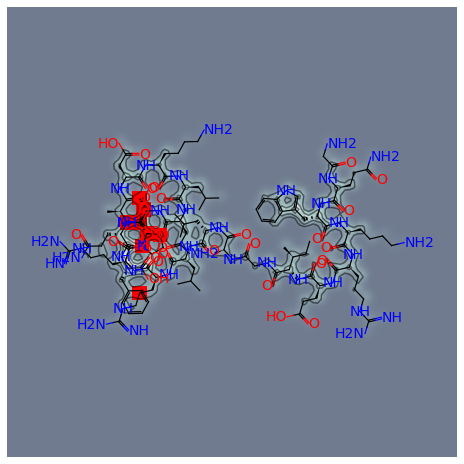

In [431]:
from rdkit.Chem.Draw import SimilarityMaps

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(low_energy_peptide, 
                                                               high_energy_peptide, 
                                                               SimilarityMaps.GetRDKFingerprint,
                                                               colorMap='bone', contourLines=5)

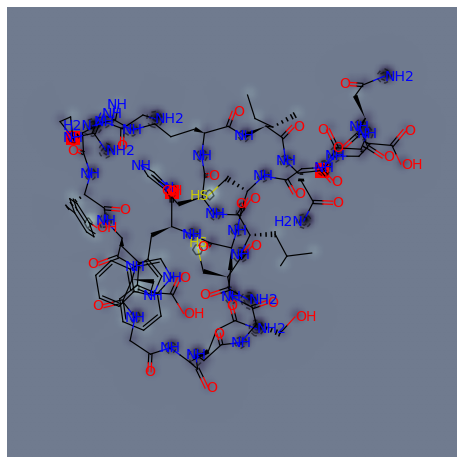

In [440]:
# LogP Contributions

contribs = Chem.rdMolDescriptors._CalcCrippenContribs(conformed_peptide)

fig = SimilarityMaps.GetSimilarityMapFromWeights(conformed_peptide,
                                                 [x for x, y in contribs], 
                                                 colorMap='bone', contourLines=5)

In [441]:
Chem.SanitizeMol(conformed_peptide)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

#### Splitting

In [443]:
Chem.rdmolops.SplitMolByPDBChainId(conformed_peptide)

{'A': <rdkit.Chem.rdchem.Mol at 0x7ff555ed3190>}

In [450]:
Chem.rdmolops.SplitMolByPDBResidues(conformed_peptide)

{'ARG': <rdkit.Chem.rdchem.Mol at 0x7ff5563a3350>,
 'ASN': <rdkit.Chem.rdchem.Mol at 0x7ff5563a3dd0>,
 'ASP': <rdkit.Chem.rdchem.Mol at 0x7ff5563a3c80>,
 'CYS': <rdkit.Chem.rdchem.Mol at 0x7ff555ec5270>,
 'GLN': <rdkit.Chem.rdchem.Mol at 0x7ff555ec5200>,
 'GLU': <rdkit.Chem.rdchem.Mol at 0x7ff555ec5190>,
 'GLY': <rdkit.Chem.rdchem.Mol at 0x7ff555ec5120>,
 'HIS': <rdkit.Chem.rdchem.Mol at 0x7ff555ec50b0>,
 'ILE': <rdkit.Chem.rdchem.Mol at 0x7ff555ec5040>,
 'LEU': <rdkit.Chem.rdchem.Mol at 0x7ff555ec5350>,
 'SER': <rdkit.Chem.rdchem.Mol at 0x7ff555ec53c0>,
 'TRP': <rdkit.Chem.rdchem.Mol at 0x7ff555ec5430>,
 'TYR': <rdkit.Chem.rdchem.Mol at 0x7ff555ec54a0>}

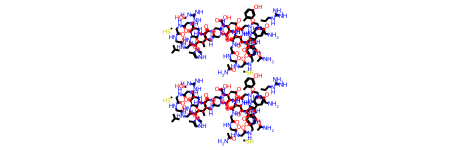

In [465]:
Chem.rdmolops.molzip(peptide, peptide)

#### Mol Blocks

In [518]:
sdf = Chem.MolToMolBlock(conformed_peptide)

pdb_writer = Chem.rdmolfiles.PDBWriter('peptide_writer.pdb')

pdb_writer.write(sdf)

OSError: File error: Bad output file peptide_writer.pdb

In [515]:
with open('peptide_writer.pdb', 'w+') as f:
    
    pdb_writer = Chem.rdmolfiles.PDBWriter(f)
    
    f.write(conformed_peptide)
    f.write(conformed_peptide)

FileNotFoundError: [Errno 2] No such file or directory: 'peptide_writer.pdb'

In [509]:
Chem.rdmolfiles.MolToSmiles(conformed_peptide)
Chem.rdmolfiles.MolToSequence(conformed_peptide)

'GRYWEGQGSCLHRIGDNGNCNW'